##Saving a panda dataframe as an image. 

<p style="text-align:right"> jfb, June 13, 2015</p>

Ideally we should have something like `df.to_jpg()`. But this does not exist yet.. Here is a workaround.
 -  a possibility is to save the dataframe as a LaTeX table, then call LateX to compile a document including this table. An example is provided [here](http://stackoverflow.com/questions/26678467/export-a-pandas-dataframe-as-a-table-image).
 - a second possibility is to convert the df to html then use an helper function to convert it to an image. This is what is detailed below (*of course the LaTeX way gives more pretty results*).
 

##A simple approach

- Install wkhtmltopdf : http://wkhtmltopdf.org/downloads.html
- [imagemagik](http://www.imagemagick.org/) can be useful to crop the resulting images but is not absolutely necessary


In [32]:
!wkhtmltoimage

You need to specify at least one input file, and exactly one output file
Use - for stdin or stdout

Name:
  wkhtmltoimage 0.12.2.1

Synopsis:
  wkhtmltoimage [OPTIONS]... <input file> <output file>
  
Description:
  Converts an HTML page into an image, 

General Options:
      --crop-h <int>                  Set height for cropping
      --crop-w <int>                  Set width for cropping
      --crop-x <int>                  Set x coordinate for cropping
      --crop-y <int>                  Set y coordinate for cropping
  -H, --extended-help                 Display more extensive help, detailing
                                      less common command switches
  -f, --format <format>               Output file format
      --height <int>                  Set screen height (default is calculated
                                      from page content) (default 0)
  -h, --help                          Display help
      --license                       Output license information and 

Now, the idea is to define a function that takes the dataframe, save it as html and convert it

In [215]:
def export_dataframe_as_image(df, filename="out.jpg", output_format="jpg", quality=100):
    import pandas as pd
    import subprocess
    # We need to add some css to tailor (improve) the table rendering
    style="""<style>table{border-collapse:collapse;border-spacing:4px;  
    border-color: gray; font-size: 14px; font-family: Arial,Helvetica,sans-serif;}
    td,th{padding:6} *:before, *:after {box-sizing: border-box;}</style>""" 
    z=style+df.to_html()
    
    with open("tmp.html","wt") as f:   #tmp.html is overwrited if it exists
        f.write(z)
    # we call wkhtmltoimage to convert the html then imagemagic's convert to crop the image
    error_code=subprocess.call(['wkhtmltoimage', '-f', output_format, '--quality', str(quality), 
                                 "tmp.html", filename]) 
    try:  #if imagemagick is present
        error_code2=subprocess.call(['convert', filename, '-trim', filename]) #imagemagic for automatic crop
    except:
        pass
    if error_code: return error_code

##Test

In [3]:
import pandas as pd
from IPython.display import HTML, display, Image

In [4]:
chickens_weight_feed=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/chickwts.csv")

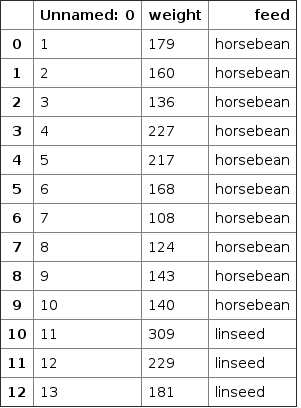

In [214]:
export_dataframe_as_image(chickens_weight_feed.loc[0:12],"test.jpg")
Image("test.jpg")

## Adding the new method to Dataframes objects

Now we could add this method to pd.Dataframes object (see a discussion [here](http://www.ianlewis.org/en/dynamically-adding-method-classes-or-class-instanc)). This is as easy as

In [121]:
pd.DataFrame.export_as_image = export_dataframe_as_image 

Let us test this

In [188]:
df=pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/cars.csv")
df.loc[0:10].export_as_image(filename="cars.png", output_format="png")

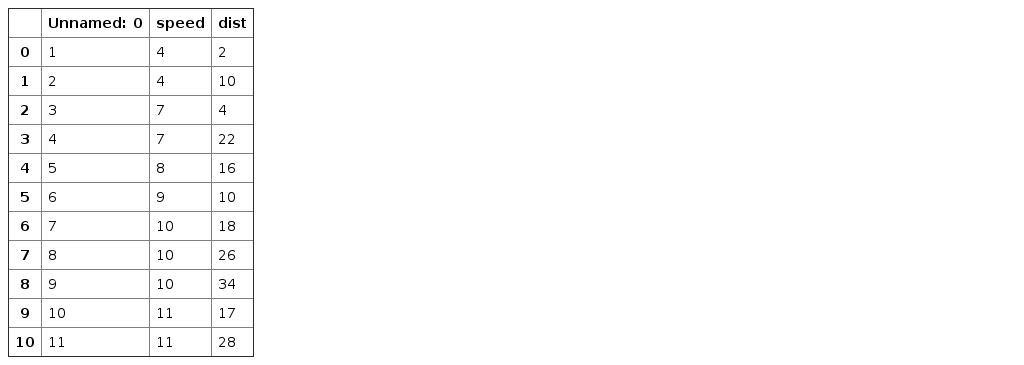

In [124]:
Image("cars.png")

Finally, we can define some new export methods, namely `to_jpg`,  `to_png`, `to_bmp` and `to_svg`...

In [216]:
def dftojpg(df,filename,quality=100):
    return export_dataframe_as_image(df, filename=filename, output_format="jpg", quality=100)
def dftopng(df,filename,quality=100):
    return export_dataframe_as_image(df, filename=filename, output_format="png", quality=100)
def dftobmp(df,filename,quality=100):
    return export_dataframe_as_image(df, filename=filename, output_format="bmp", quality=100)
def dftosvg(df,filename,quality=100):
    return export_dataframe_as_image(df, filename=filename, output_format="svg", quality=100)

#
pd.DataFrame.to_jpg = dftojpg
pd.DataFrame.to_png = dftopng
pd.DataFrame.to_bmp = dftobmp
pd.DataFrame.to_svg = dftosvg

**Example**

In [219]:
df.loc[0:8].to_jpg("out.jpg")

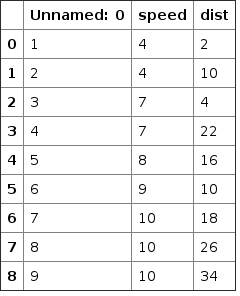

In [220]:
Image("out.jpg")

Voila!